<a href="https://colab.research.google.com/github/HigherGround189/EGT309-Team-Harish-Kanna/blob/main/EDA/Jun_Hoe_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy import Table, Column, Integer, String, MetaData
import seaborn as sns
import sqlite3
import pandas as pd

In [1]:
!gdown --fuzzy https://drive.google.com/file/d/17S8vGBsbaAcuxgwSZLGhOOrrhfaqio7j/view?usp=sharing
!mkdir data/
!mv bmarket.db data/

Downloading...
From: https://drive.google.com/uc?id=17S8vGBsbaAcuxgwSZLGhOOrrhfaqio7j
To: /content/bmarket.db
100% 3.15M/3.15M [00:00<00:00, 199MB/s]


In [4]:
con = sqlite3.connect("data/bmarket.db")
cursor = con.cursor()

In [5]:
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
for row in cursor.fetchall():
    print(row)

('bank_marketing',)


In [ ]:
query = "SELECT * FROM bank_marketing;"
df = pd.read_sql_query(query, con)
df.head()

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no


![IMAGE of attributes of bank marketing table](https://github.com/HigherGround189/EGT309-Team-Harish-Kanna/blob/main/EDA/images/bmarketing_attributes.png?raw=1)

## 1. Initiate Data Understanding and Insights

In [ ]:
df

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,NaN,married,NaN,NaN,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,NaN,no,Cell,2,999,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,6266,58 years,retired,married,professional.course,NaN,no,no,Telephone,2,999,no
41184,11285,37 years,management,married,university.degree,no,no,no,telephone,1,999,no
41185,38159,35 years,admin.,married,high.school,no,NaN,no,cellular,1,4,yes
41186,861,40 years,management,married,university.degree,no,NaN,no,telephone,2,999,no


In [ ]:
df.info()
print("\nTable Size:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           16399 non-null  object
 7   Personal Loan          37042 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB

Table Size: (41188, 12)


In [ ]:
df.isna().sum()

Client ID                    0
Age                          0
Occupation                   0
Marital Status               0
Education Level              0
Credit Default               0
Housing Loan             24789
Personal Loan             4146
Contact Method               0
Campaign Calls               0
Previous Contact Days        0
Subscription Status          0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

> **OBSERVATION:**
___

- Reading the bank marketing table, the dataframe has **41188 rows** and **12 columns**.

- While observing the .info(), we can see that **`Client ID`**, **`Campaign Call`** and **`Previous Contact Days`** is assigned as *Integer* type. While the remaining columns are *Object* type.

- Furthermore, the .info() also shows that all of the columns has no empty values besides **Housing Loan (24789 missing data)** and **Personal Loan (4146 missing data)**.

- There is **no duplicated data** found.

(Temp) - In addition, the table displayed shows signs of **missing data** in certain columns (e.g. `Occupation`, `Education Level`, `Credit Default`). These columns **were expected to have no empty values** based on previous statement. These missing values are refered to as *unknown*.

- The `Subscription Status` column shows values of *yes* or *no* in string type instead of *True* or *False* in boolean type.

- Lastly, the values in `Age` column seems to **contains the text *years*** after all the numeric values, which is unnecessary. While `Education Level` column has a **two part format with a '.' between two key words** (e.g. high.school, univeristy.degree). The `Occupation` column has an **admin role that ended with '.'**.



> **THOUGHT PROCESS:**
___

(Temp) 1. I need to replace all the *unknown* with *numpy NaN (np.nan)* to ensure all the missing data is captured.

2. A deeper observation into `Education Level` and `Occupation` columns is required to get a better understanding before cleaning.

3. I can remove *years* from the values in `Age` column and change the data type to *Integer*.

4. I can convert `Subscription Status` column into boolean type, with values of *True* or *False*, since the attribute says the column is defines as "Whether the client subscribed or not".

#### Temp (1a. Replace *unknown* and *None* with np.nan)

In [ ]:
replace_with_nan = ["unknown", None]
df.replace(replace_with_nan, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             40858 non-null  object
 3   Marital Status         41108 non-null  object
 4   Education Level        39457 non-null  object
 5   Credit Default         32591 non-null  object
 6   Housing Loan           16006 non-null  object
 7   Personal Loan          36165 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


In [ ]:
df.isna().sum()

Client ID                    0
Age                          0
Occupation                 330
Marital Status              80
Education Level           1731
Credit Default            8597
Housing Loan             25182
Personal Loan             5023
Contact Method               0
Campaign Calls               0
Previous Contact Days        0
Subscription Status          0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

> **Observation:**
___



#### 1b. Understanding Column data by Columns and insights

##### `Client ID` Column

In [ ]:
print("Number of unique values:", df["Client ID"].nunique())

Number of unique values: 41188


> **OBSERVATION:**
___

- All rows/entries are uniquely identified by the Client ID.
- No repeated Client ID throughout data.

> **THINKING PROCESS:**
___

1. `Client ID` column can be remove as it serves no predicting values and contribute to high dimensionality issue in input data.

##### `Age` Column

In [ ]:
display(df["Age"].describe())
print("List all unique values:\n", df["Age"].sort_values().unique())

count         41188
unique           77
top       150 years
freq           4197
Name: Age, dtype: object

List all unique values:
 ['150 years' '17 years' '18 years' '19 years' '20 years' '21 years'
 '22 years' '23 years' '24 years' '25 years' '26 years' '27 years'
 '28 years' '29 years' '30 years' '31 years' '32 years' '33 years'
 '34 years' '35 years' '36 years' '37 years' '38 years' '39 years'
 '40 years' '41 years' '42 years' '43 years' '44 years' '45 years'
 '46 years' '47 years' '48 years' '49 years' '50 years' '51 years'
 '52 years' '53 years' '54 years' '55 years' '56 years' '57 years'
 '58 years' '59 years' '60 years' '61 years' '62 years' '63 years'
 '64 years' '65 years' '66 years' '67 years' '68 years' '69 years'
 '70 years' '71 years' '72 years' '73 years' '74 years' '75 years'
 '76 years' '77 years' '78 years' '79 years' '80 years' '81 years'
 '82 years' '83 years' '84 years' '85 years' '86 years' '88 years'
 '89 years' '91 years' '92 years' '95 years' '98 years']


<Axes: xlabel='Age', ylabel='Frequency'>

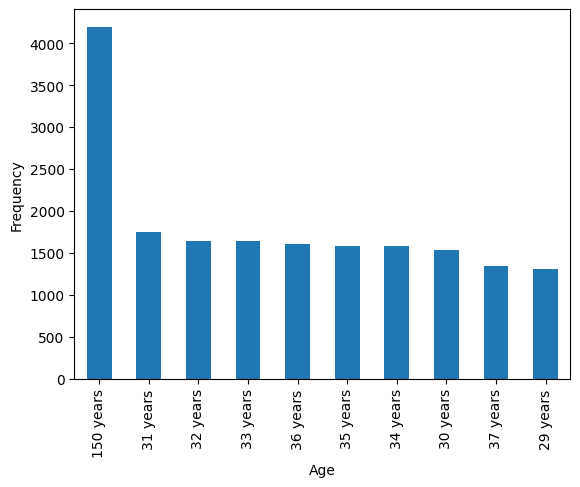

In [ ]:
df["Age"].value_counts().head(10).plot(kind='bar', ylabel="Frequency")

> **OBSERVATION:**
___

- "150 years" !!! Most likely a recorded error.
- The value "150 years" has the highest frequency by a large margin compared to other ages.
- The values in `Age` column do **contains the text *years*** after all the numeric values, which is a data type issue.

> **THINKING PROCESS**
___

- I can remove *years* from the values in `Age` column.
- Convert the data type to *Integer*.
- Plot histogram to get better insights and possibly impute the "150 years"

In [ ]:
df_age = df["Age"].map(lambda x: x.split()[0])
df_age = df_age.astype(int)
df_age

0        57
1        55
2        33
3        36
4        27
         ..
41183    58
41184    37
41185    35
41186    40
41187    29
Name: Age, Length: 41188, dtype: int64

<Axes: >

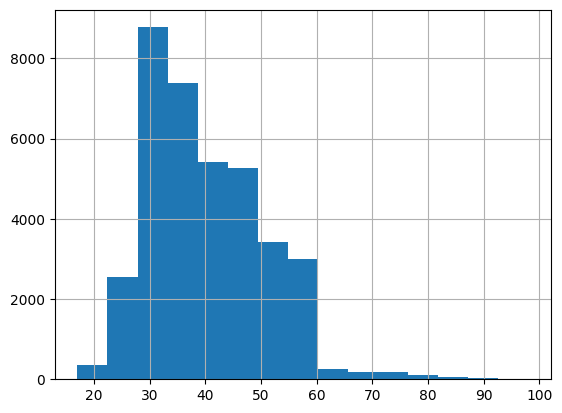

In [ ]:
fig = df_age[df_age != 150].hist(bins=15)
fig.show()

##### `Occupation` Column

In [ ]:
display(df["Occupation"].describe())
print("List all unique values:\n", df["Occupation"].sort_values().unique())

count      40858
unique        11
top       admin.
freq       10422
Name: Occupation, dtype: object

List all unique values:
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' nan]


<Axes: xlabel='Occupation', ylabel='Frequency'>

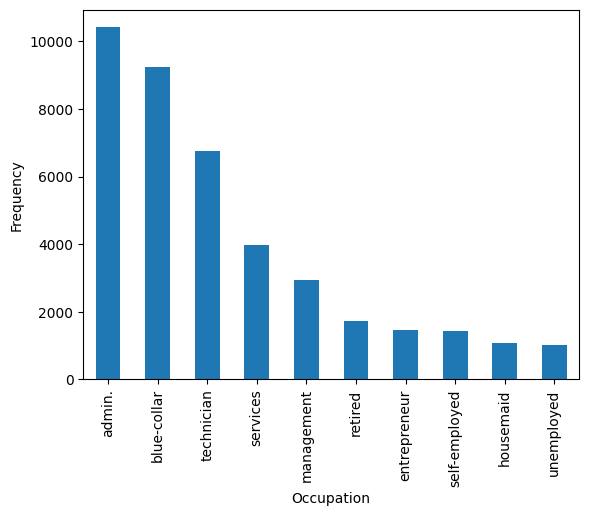

In [ ]:
df["Occupation"].value_counts().head(10).plot(kind='bar', ylabel="Frequency")

> **Observation:**
___

- Only admin. need to be rename as admin
- It is a Norminal Category
- Possible to one-hot or integer encode to feed into machine learning

##### `Marital Status` Column

In [ ]:
display(df["Marital Status"].describe())
print("List all unique values:\n", df["Marital Status"].sort_values().unique())

count       41108
unique          3
top       married
freq        24928
Name: Marital Status, dtype: object

List all unique values:
 ['divorced' 'married' 'single' nan]


<Axes: xlabel='Marital Status', ylabel='Frequency'>

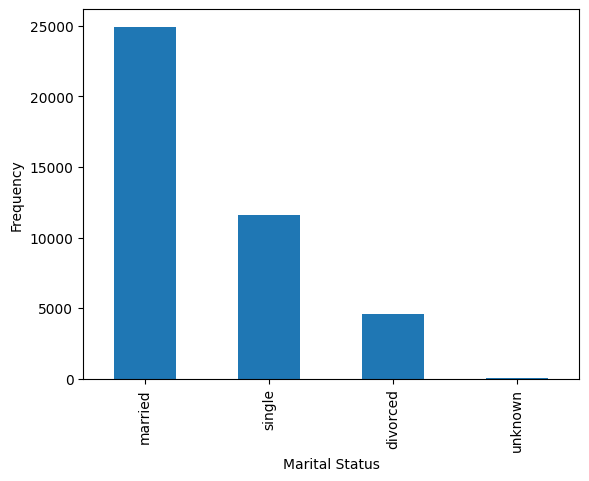

In [ ]:
df["Marital Status"].value_counts().plot(kind='bar', ylabel="Frequency")

> **Observation:**
___

- Mostly Married, second Singles

##### `Education Level` Column

In [ ]:
display(df["Education Level"].describe())
print("List all unique values:\n", df["Education Level"].sort_values().unique())

count                 39457
unique                    7
top       university.degree
freq                  12168
Name: Education Level, dtype: object

List all unique values:
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' nan]


<Axes: xlabel='Education Level', ylabel='Frequency'>

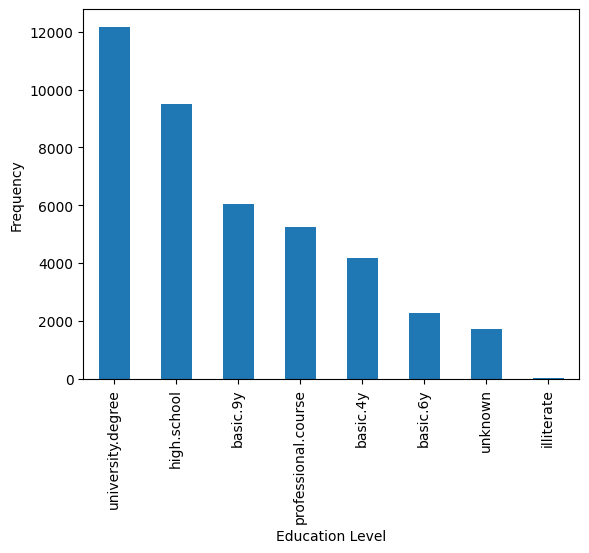

In [ ]:
df["Education Level"].value_counts().plot(kind='bar', ylabel="Frequency")

> **Observation:**
___

-

##### `Credit Default` Column

In [ ]:
display(df["Credit Default"].describe())
print("List all unique values:\n", df["Credit Default"].sort_values().unique())

count     41188
unique        3
top          no
freq      32588
Name: Credit Default, dtype: object

List all unique values:
 ['no' 'unknown' 'yes']


<Axes: xlabel='Credit Default', ylabel='Frequency'>

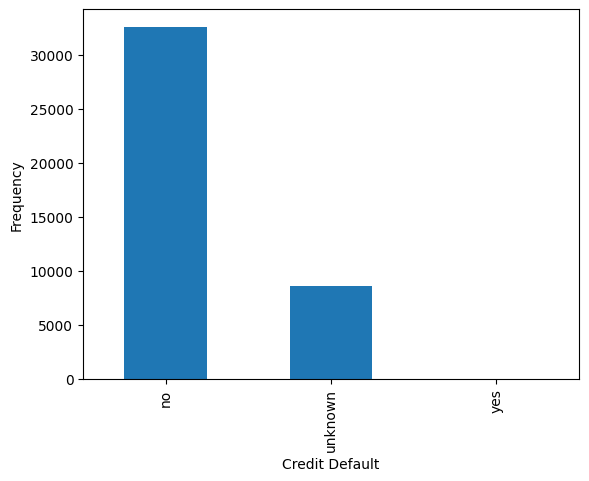

In [ ]:
df["Credit Default"].value_counts().plot(kind='bar', ylabel="Frequency")

##### `Housing Loan` Column

In [ ]:
display(df["Housing Loan"].describe())
print("List all unique values:\n", df["Housing Loan"].sort_values().unique())

count     16399
unique        3
top         yes
freq       8595
Name: Housing Loan, dtype: object

List all unique values:
 ['no' 'unknown' 'yes' None]


<Axes: xlabel='Housing Loan', ylabel='Frequency'>

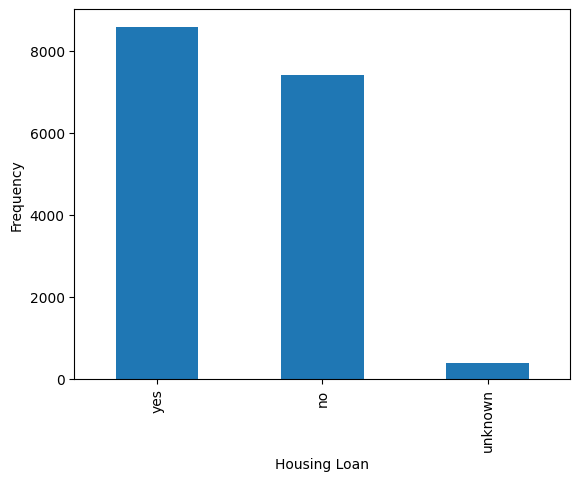

In [ ]:
df["Housing Loan"].value_counts().plot(kind='bar', ylabel="Frequency")

##### `Personal Loan` Column

In [ ]:
display(df["Personal Loan"].describe())
print("List all unique values:\n", df["Personal Loan"].sort_values().unique())

count     37042
unique        3
top          no
freq      30532
Name: Personal Loan, dtype: object

List all unique values:
 ['no' 'unknown' 'yes' None]


<Axes: xlabel='Personal Loan', ylabel='Frequency'>

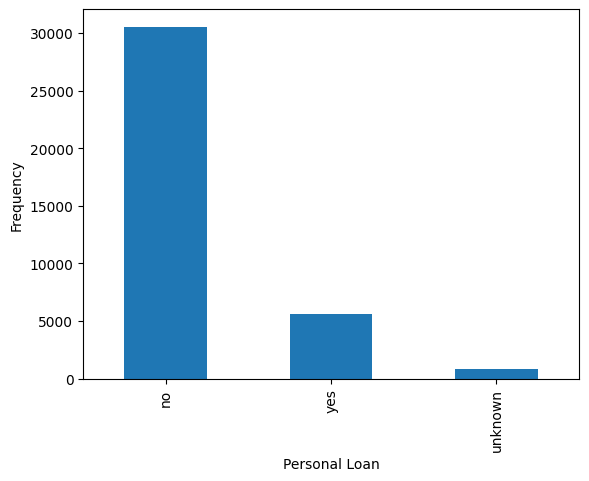

In [ ]:
df["Personal Loan"].value_counts().plot(kind='bar', ylabel="Frequency")

##### `Contact Method` Column

In [ ]:
display(df["Contact Method"].describe())
print("List all unique values:\n", df["Contact Method"].sort_values().unique())

count     41188
unique        4
top        Cell
freq      13100
Name: Contact Method, dtype: object

List all unique values:
 ['Cell' 'Telephone' 'cellular' 'telephone']


##### `Campaign Calls` Column

In [ ]:
display(df["Campaign Calls"].describe())
print("List all unique values:\n", df["Campaign Calls"].sort_values().unique())

count    41188.000000
mean         2.051374
std          3.171345
min        -41.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: Campaign Calls, dtype: float64

List all unique values:
 [-41 -35 -32 -29 -28 -25 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12
 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  37  39  40  42  43  56]


<Axes: xlabel='Campaign Calls', ylabel='Frequency'>

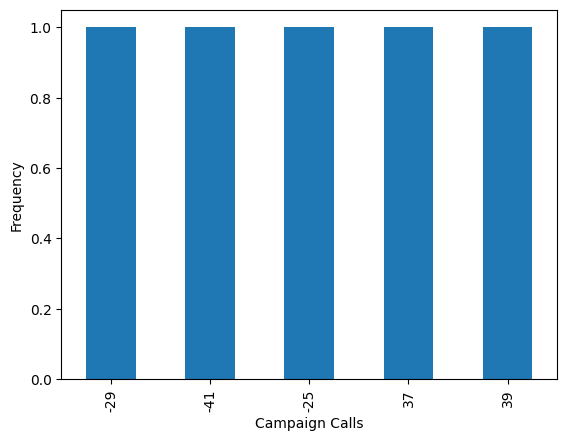

In [ ]:
df["Campaign Calls"].value_counts().plot(kind='bar', ylabel="Frequency")

##### `Previous Contact Days` Column

In [ ]:
display(df[df["Previous Contact Days"]!=999]["Previous Contact Days"].describe())
print("List all unique values:\n", df["Previous Contact Days"].sort_values().unique())

count    1515.000000
mean        6.014521
std         3.824906
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: Previous Contact Days, dtype: float64

List all unique values:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  25  26  27 999]


<Axes: ylabel='Frequency'>

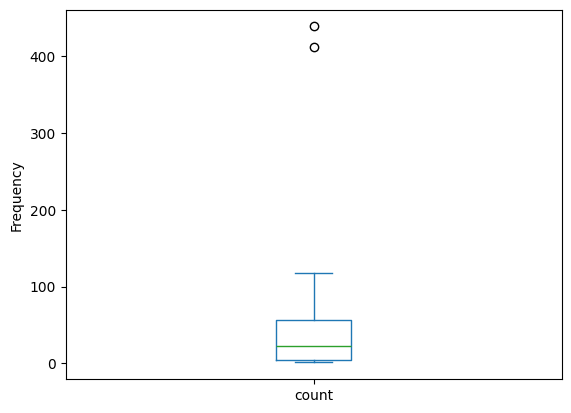

In [ ]:
df[df["Previous Contact Days"]!=999]["Previous Contact Days"].value_counts().plot(kind='box', ylabel="Frequency")

<Axes: xlabel='count'>

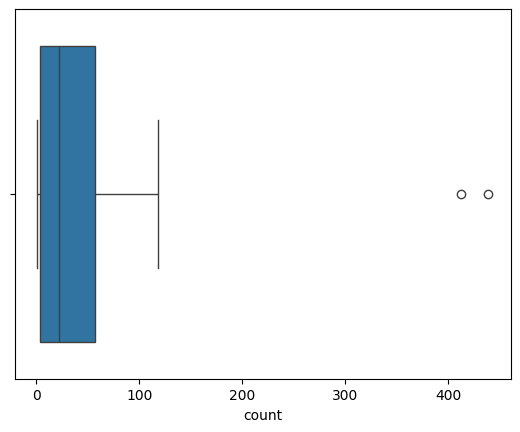

In [ ]:
sns.boxplot(x=df[df["Previous Contact Days"]!=999]["Previous Contact Days"].value_counts())

##### `Subscription Status` Column

In [ ]:
display(df["Subscription Status"].describe())
print("List all unique values:\n", df["Subscription Status"].sort_values().unique())

count     41188
unique        2
top          no
freq      36548
Name: Subscription Status, dtype: object

List all unique values:
 ['no' 'yes']


<Axes: xlabel='Subscription Status', ylabel='Frequency'>

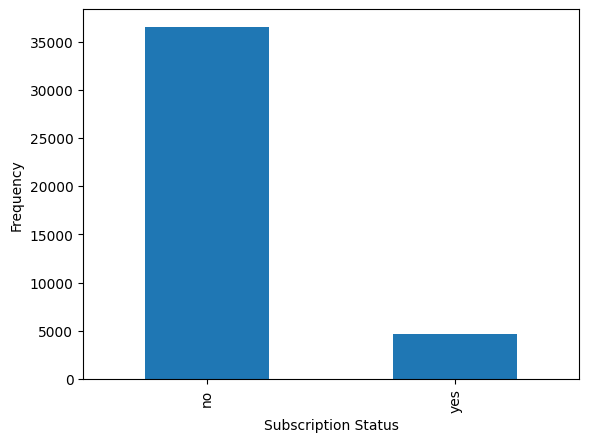

In [ ]:
df["Subscription Status"].value_counts().plot(kind='bar', ylabel="Frequency")